In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtf=pd.read_csv('Uber Request Data.csv')

In [3]:
dtf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15/07/2016 23:49,NaN
6741,6752,Airport,NaN,No Cars Available,15/07/2016 23:50,NaN
6742,6751,City,NaN,No Cars Available,15/07/2016 23:52,NaN
6743,6754,City,NaN,No Cars Available,15/07/2016 23:54,NaN


In [4]:
#Show the Fast 5 records of the dataset.
#dtf[:5] 
dtf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25


In [5]:
#Show the last 5 records of the dataset.
dtf.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15/07/2016 23:49,NaN
6741,6752,Airport,NaN,No Cars Available,15/07/2016 23:50,NaN
6742,6751,City,NaN,No Cars Available,15/07/2016 23:52,NaN
6743,6754,City,NaN,No Cars Available,15/07/2016 23:54,NaN
6744,6753,Airport,NaN,No Cars Available,15/07/2016 23:55,NaN


In [6]:
# Total shape of the Dataset.
dtf.shape

(6745, 6)

In [7]:
#Total size of the Dataset.
dtf.size

40470

In [8]:
#All information about the Dataset.
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
#How may missing values are presnt.
dtf.isnull().values.sum()

6564

In [10]:
#Show the all null values.
dtf.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [11]:
dtf.isnull().sum()/len(dtf)*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

### Drop the unnecessary columns from dataframe.

In [12]:
dtf.drop('Drop timestamp', axis=1,inplace=True)
dtf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57
2,1807,City,1.0,Trip Completed,12/07/2016 09:17
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08
4,3112,City,1.0,Trip Completed,13/07/2016 08:33


### Fill the missing value.
#(149.0 is missing value number (Driver id))

In [13]:
dtf['Driver id']=dtf['Driver id'].fillna(dtf['Driver id'].median())
dtf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57
2,1807,City,1.0,Trip Completed,12/07/2016 09:17
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08
4,3112,City,1.0,Trip Completed,13/07/2016 08:33


#### Top 5 Request timestamp 

In [14]:
#start the trip on 11.07.2016 (00.00).
d1=dtf.sort_values(by='Request timestamp',ascending=True)
d1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
1303,1363,Airport,136.0,Trip Completed,11/07/2016 00:00
4095,1362,City,149.0,No Cars Available,11/07/2016 00:02
1462,1367,City,155.0,Trip Completed,11/07/2016 00:05
4096,1364,City,149.0,No Cars Available,11/07/2016 00:06
4097,1366,City,149.0,No Cars Available,11/07/2016 00:09


#### Last 5 Request timestamp in Uber 

In [15]:
#Last trip on 15.7.2016 (23.59).
d1=dtf.sort_values(by='Request timestamp',ascending=False)
d1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
2401,6757,Airport,251.0,Trip Completed,15/07/2016 23:59
3339,6759,City,125.0,Cancelled,15/07/2016 23:59
1095,6755,Airport,113.0,Trip Completed,15/07/2016 23:57
1319,6756,City,137.0,Trip Completed,15/07/2016 23:57
6744,6753,Airport,149.0,No Cars Available,15/07/2016 23:55


In [16]:
dtf.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp'],
      dtype='object')

In [17]:
dtf.shape

(6745, 5)

In [18]:
dtf['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [19]:
#Finde out Duplicate Value.
dtf.duplicated('Request id').sum()

0

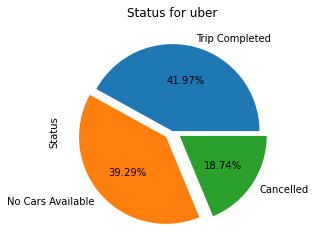

In [20]:
dtf['Status'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.1,0.1])
plt.title('Status for uber')
plt.show()

This graph is defin Trip completed Percentage is 41.97%. and No cars availables is 39.29%. cancelled cars percentage is 18.74. 
we can see the data is mostly cancelled pecentage is higher than trip completed and cancelled.

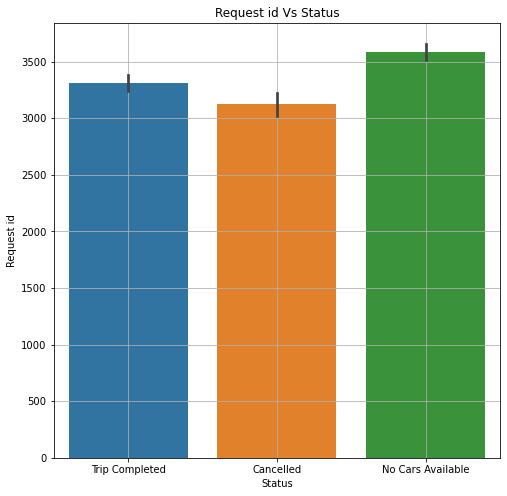

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(data=dtf,y='Request id',x='Status')
plt.grid()
plt.title('Request id Vs Status')
plt.show()

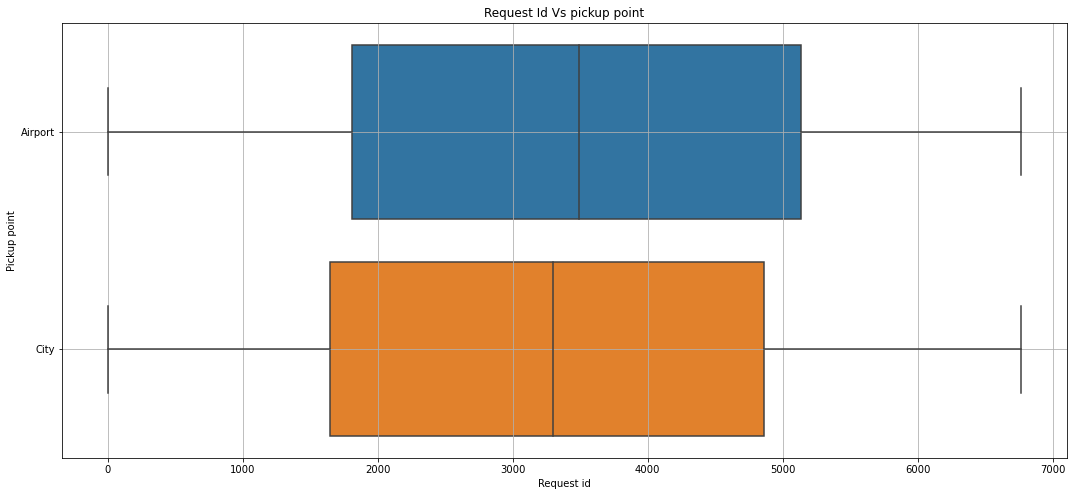

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(data=dtf,x='Request id',y='Pickup point')
plt.grid()
plt.title('Request Id Vs pickup point');

This Graph show the Request id vs pickup point.The pickup point is defien Airport and city. the City graph shows lower whiskey is o and lower quartilc is 1000 to 2000 between. median is 3000 above. and upper quartilc is less than 5000.not show the outliers. Airport Graph show lower whiskey is 0 and lower quartilc is less than 2000. median is 3000 to 4000 between.and upper quartilc is more than 5000.not show outliers.

We can see data looks like thea Airprot data having better Request id as City but also we have to noticed City pickup point is also near by Airplort and it means both are having better in request id.

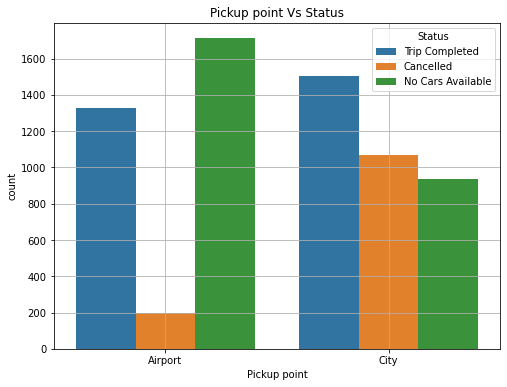

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=dtf,x='Pickup point',hue='Status')
plt.title('Pickup point Vs Status')
plt.grid()
plt.show()

In [24]:
def sucecess(pas):
    pickup,Status=pas
    if pickup=='Airport' and Status=='Trip Completed':
        return 'Completed Airport Drop'
    else:
        return 'others'
dtf['Airport']=dtf[['Pickup point','Status']].apply(sucecess,axis=1)

#### Total Completed Airport Drop is 1327

In [25]:
dtf['Airport'].value_counts()

others                    5418
Completed Airport Drop    1327
Name: Airport, dtype: int64

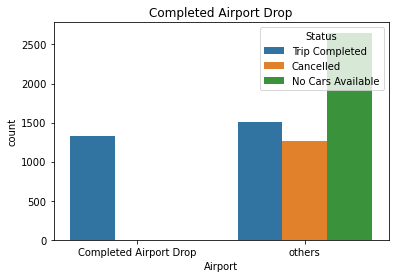

In [26]:
sns.countplot(data=dtf,x='Airport',hue='Status')
plt.title('Completed Airport Drop')
plt.show()

In [27]:
def success(AA):
    Pickup, Status=AA
    if Pickup=='City' and Status=='Trip Completed':
        return 'Completed City Drop'
    else:
        return 'Others'
dtf['City']=dtf[['Pickup point','Status']].apply(success,axis=1)

#### Total Completed City Drop is 1504

In [28]:
dtf['City'].value_counts()

Others                 5241
Completed City Drop    1504
Name: City, dtype: int64

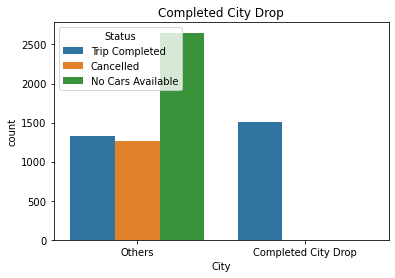

In [29]:
sns.countplot(data=dtf,x='City',hue='Status')
plt.title('Completed City Drop');